In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from skimage import filters, io
from skimage.color import rgb2gray


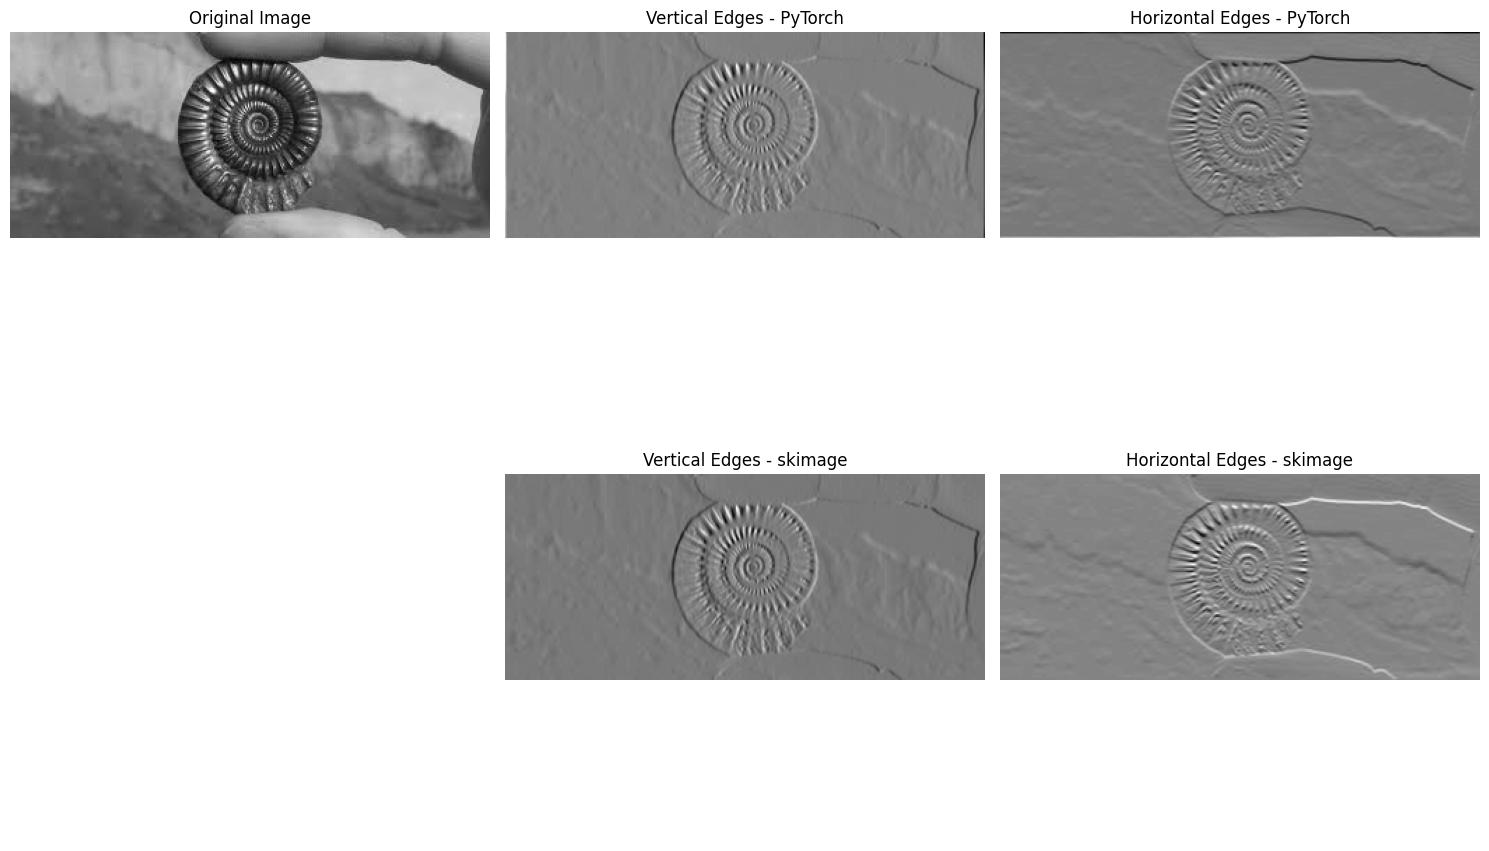

In [2]:
#original_image_path = 'fossill.jpg'
original_image = io.imread('fossill.jpg')
grayscale_image = rgb2gray(original_image)

# Define the Sobel edge detection functions 
def sobel_edges_torch(image):
    # edge detection filters
    vertical_filter = torch.tensor([[-1., 0., 1.],
                                    [-2., 0., 2.],
                                    [-1., 0., 1.]])
    horizontal_filter = torch.tensor([[1., 2., 1.],
                                      [0., 0., 0.],
                                      [-1., -2., -1.]])
    
    # Add batch and channel dimensions and convert to float
    image_tensor = torch.from_numpy(image).unsqueeze(0).unsqueeze(0).float()
    
    # Apply vertical and horizontal filters
    vertical_edges = F.conv2d(image_tensor, vertical_filter.unsqueeze(0).unsqueeze(0), padding=1)
    horizontal_edges = F.conv2d(image_tensor, horizontal_filter.unsqueeze(0).unsqueeze(0), padding=1)
    
    return vertical_edges.squeeze().numpy(), horizontal_edges.squeeze().numpy()

def sobel_edges_skimage(image):
    # vertical and horizontal filters
    vertical_edges = filters.sobel_v(image)
    horizontal_edges = filters.sobel_h(image)
    
    return vertical_edges, horizontal_edges

# Apply functions
vertical_edges_torch, horizontal_edges_torch = sobel_edges_torch(grayscale_image) #PyTorch
vertical_edges_skimage, horizontal_edges_skimage = sobel_edges_skimage(grayscale_image) #skimage

# Plotting function for edge detection comparison
def plot_edge_comparison(original, torch_vertical, torch_horizontal, skimage_vertical, skimage_horizontal):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Original image
    ax = axes.flat[0]
    ax.imshow(original, cmap='gray')
    ax.set_title('Original Image')
    ax.axis('off')
    
    # Vertical edges with PyTorch
    ax = axes.flat[1]
    ax.imshow(torch_vertical, cmap='gray')
    ax.set_title('Vertical Edges - PyTorch')
    ax.axis('off')
    
    # Horizontal edges with PyTorch
    ax = axes.flat[2]
    ax.imshow(torch_horizontal, cmap='gray')
    ax.set_title('Horizontal Edges - PyTorch')
    ax.axis('off')
    
    # Vertical edges with skimage
    ax = axes.flat[4]
    ax.imshow(skimage_vertical, cmap='gray')
    ax.set_title('Vertical Edges - skimage')
    ax.axis('off')
    
    # Horizontal edges with skimage
    ax = axes.flat[5]
    ax.imshow(skimage_horizontal, cmap='gray')
    ax.set_title('Horizontal Edges - skimage')
    ax.axis('off')
    
    
    axes.flat[3].axis('off')
    plt.tight_layout()
    return plt

# plot
plot = plot_edge_comparison(grayscale_image, vertical_edges_torch, horizontal_edges_torch, vertical_edges_skimage, horizontal_edges_skimage)

# Save the plot to a file
#plot_file_path = '.../data/edge_detection_comparison.jpg'
#plot.savefig(plot_file_path)
#plot_file_path


Bright areas in the image represent strong gradients. It can be noticed that with vertical edge detection, the intensity changes significantly in that direction, while with horizontal edge detection, it does in the horizontal direction. (for both torch and skimage)

In [3]:
#the difference between the two implementations 
print(np.abs(vertical_edges_skimage-vertical_edges_torch).mean())

0.11280338867109514


In [4]:
#the difference between the two implementations 
print(np.abs(horizontal_edges_skimage-horizontal_edges_torch).mean())

0.22373393406762013


The difference between the two methods is small.

In [ ]:
#horizontal_edges_skimage